# Great Library Company
The Great Library Company (GLC) is one of the biggest book selling companies in Westeros, with over 200k yearly consumers and 100k registered clients.  
Currently the GLC sells books in three different channels, in physical stores, through yearly catalogues or through the Website. The books sold are from five main categories: Technical; Adventure; Romance; History; Traveling;

### Import Packages
In this step the libraries used for the Classification project are initiated.

In [119]:
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import tree
from random import shuffle
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix, balanced_accuracy_score 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
%matplotlib inline

### Import DataCenter
In this step a function is declared to import target files from folder with target name into a pandas DataFrame.

In [120]:
def import_files():
    cwd = os.getcwd()
    cwd_files = os.listdir(cwd)
    target_gfile = input('What target group file do you wish to process\n (Numbered 01 to 25) ')
    df_file = [f for f in cwd_files if target_gfile in f and 'xlsx' in f]

    df = pd.DataFrame()
    for idx, f in enumerate(df_file):
        df_temp = pd.read_excel(f)
        df = df_temp.append(df)
        print("File number {}".format(idx+1),"was processed")
    df.reset_index(inplace=True)
    df = df.drop(['index'],axis=1)
    print("A total of {}".format(idx+1),"files were processed")
    return df

In [121]:
df = import_files()

What target group file do you wish to process
 (Numbered 01 to 25) 07
File number 1 was processed
A total of 1 files were processed


### Data AnalysisCenter
An analysis is done on the dataset that has been provided by studying the types of columns present, possibility of missing data or finally an examination of odd values present in the first couple of entries.

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 29 columns):
Custid                 2500 non-null int64
Year_Birth             2500 non-null int64
Education              2500 non-null object
Marital_Status         2500 non-null object
Income                 2500 non-null int64
Kidhome                2500 non-null int64
Teenhome               2500 non-null int64
Dt_Customer            2500 non-null datetime64[ns]
Recency                2500 non-null int64
MntTechnical           2500 non-null int64
MntRomance             2500 non-null int64
MntAdventure           2500 non-null int64
MntTravelling          2500 non-null int64
MntHistory             2500 non-null int64
MntHardcover           2500 non-null int64
NumDealsPurchases      2500 non-null int64
NumWebPurchases        2500 non-null int64
NumCatalogPurchases    2500 non-null int64
NumStorePurchases      2500 non-null int64
NumWebVisitsMonth      2500 non-null int64
AcceptedCmp2          

The dataset has a datetime variable, 24 integer variables and 2 object class variables and 2500 rows.

In [123]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Custid,2500.0,7.001821e+07,8661.738685,70003107.0,70010636.25,70018126.5,70025763.75,70033098.0
Year_Birth,2500.0,1.970288e+03,12.091042,1942.0,1960.00,1971.0,1979.00,1999.0
Income,2500.0,7.671628e+04,32783.349464,2206.0,50781.00,75606.0,102018.50,203085.0
Kidhome,2500.0,4.420000e-01,0.545853,0.0,0.00,0.0,1.00,2.0
Teenhome,2500.0,4.880000e-01,0.548066,0.0,0.00,0.0,1.00,2.0
Recency,2500.0,4.918320e+01,29.103712,0.0,24.00,49.0,74.00,99.0
MntTechnical,2500.0,3.017988e+03,3323.747368,0.0,240.00,1750.0,5070.00,14990.0
MntRomance,2500.0,5.428136e+02,802.008785,0.0,40.00,180.0,700.00,3940.0
MntAdventure,2500.0,2.570888e+03,3348.381450,0.0,240.00,990.0,3678.75,14790.0
MntTravelling,2500.0,5.386968e+02,787.519139,0.0,40.00,180.0,700.00,3960.0


The Z_CostContact and Z_Revenue columns represent the cost of contacting the client (3€) and the revenue received in case the client has a positive outcome to the targeted campaign (16€). Seeing as this variable is constant along the whole DataSet we will store the unique value into a global variable and drop the columns from the active dataset.

In [124]:
global CostContact 
CostContact  = df.Z_CostContact[0]
global Revenue 
Revenue = df.Z_Revenue[0]
df = df.drop(['Z_CostContact','Z_Revenue'],1)

It is important to evaluate the existence of null variable in the dataset.

In [125]:
if df.shape[0] > df.dropna().shape[0]:
    print('There are missing values which represent',(1-df.dropna().shape[0]/df.shape[0])*100,'%')
else:
    print('There are no missing values in the data set which has',df.shape[0],'rows and',df.shape[1],'columns')

There are no missing values in the data set which has 2500 rows and 27 columns


It is possible to verify that there aren't any null values in the dataset from the function used in the cell above.

In [126]:
df.describe(include = 'O').T

,count,unique,top,freq
Education,2500,5,Graduation,1247
Marital_Status,2500,5,Married,1049


The GLC dataset has two variables that are categorical, the "Education" and "Marital_Status", and therefore need to be treated before being used in building a model.
One of the possible approaches is to create a column for each unique variable with a binary classification, but first we will analyse the classes to ascertain if we should join some classes together depending on their class representativity in the dataset.

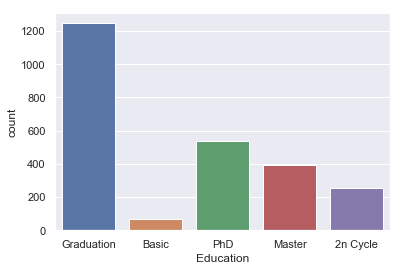

In [127]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Education", data=df)

From this we can see that basic education has very low significance in terms of volume. We will join the basic category with the 2nd cycle.

In [128]:
df['Education'] = list(map(lambda x: 'Basic Education' if 'Basic' in x or '2n Cycle' in x else x, df['Education']))

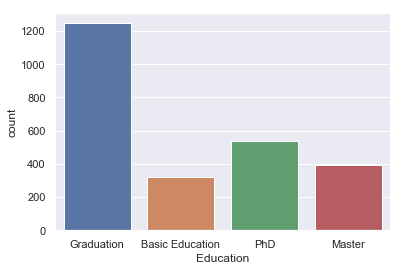

In [129]:
ax = sns.countplot(x="Education", data=df)

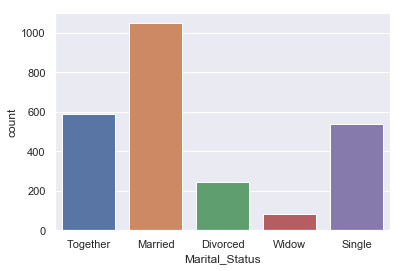

In [130]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Marital_Status", data=df)

With this observation we will evaluate whether the model has better results with the usage of a variable for each category or if joining any yields better results

In [131]:
df['Marital_Status'] = list(map(lambda x: 'Single' if 'Divorced' in x or 'Widow' in x else x, df['Marital_Status']))

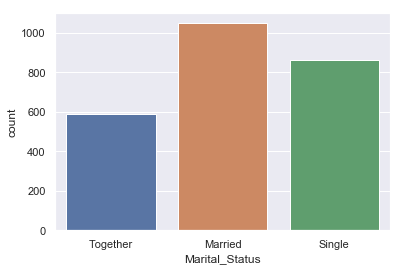

In [132]:
ax = sns.countplot(x="Marital_Status", data=df)

In [133]:
df = pd.get_dummies(df,columns = ['Education','Marital_Status'])
print('After the transformation there are',df.shape[0],'rows and',df.shape[1],'columns')

After the transformation there are 2500 rows and 32 columns


From inspecting the data we will create three new columns:  
    Childrenhome = Teenhome+Kidhome  
    MntTotal = sum(MntX)  
    NumTotal = sum(NumX)  
    AcceptedCmp = sum(Acc)

Creation of Variable Childrenhome: Total number of dependent child in the household.

In [134]:
df['Childrenhome'] = df['Kidhome'] + df['Teenhome']

Creation of AcceptedCmp variable: Total number of purchases via the several points.

In [135]:
AcceptedCmp = [c for c in df.columns if "AcceptedCmp" in c]
df['AcceptedCmp']=df[AcceptedCmp].sum(axis="columns")

Creation of NumPurchases variable: Total number of purchases via the several points.

In [136]:
NumPurchases = [c for c in df.columns if "Purchases" in c]
df['NumPurchases']=df[NumPurchases].sum(axis="columns")

Creation of the MntTotal variable: Total amount spent in the GLC company

In [137]:
MntTotal = [c for c in df.columns if "Mnt" in c]
df['MntTotal'] = df[MntTotal].sum(axis='columns')

We will use MnTotal to create normalized values of the amount spent per category.

In [138]:
Monetary = [c for c in df.columns if "Mnt" in c and "Total" not in c]
i = 0
while i < len(Monetary):
    df['Nor' + Monetary[i][3:]] = df[Monetary[i]]/df['MntTotal']
    df['NorIncome'] = df['MntTotal']/df['Income']
    i+=1

In [139]:
df.head().T

,0,1,2,3,4
Custid,70003107,70003140,70003170,70003185,70003188
Year_Birth,1963,1952,1964,1953,1978
Income,99861,82980,47732,65542,58838
Kidhome,0,0,0,1,0
Teenhome,0,1,0,1,1
Dt_Customer,2015-11-03 00:00:00,2015-10-05 00:00:00,2014-12-19 00:00:00,2015-02-17 00:00:00,2016-06-21 00:00:00
Recency,66,32,4,99,12
MntTechnical,5180,2940,50,450,200
MntRomance,1400,380,680,0,20
MntAdventure,9240,2430,270,240,90


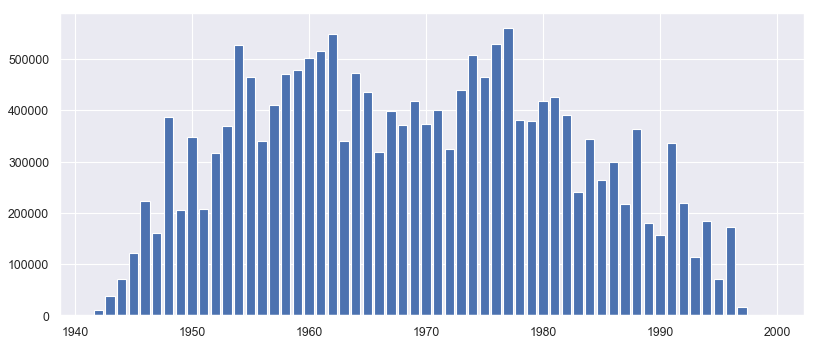

In [140]:
value = df.loc[:,['Year_Birth','MntTotal']]
value.index = value['Year_Birth']
value['MntTotal'].groupby(by=value.index).sum()

#Define the characteristics of the figure
plt.figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')

#Define the style of the seaborn figure
sns.set_style('darkgrid')

#Create an object of the countplot (barplot) to adjust parameters
ax = plt.bar(x = value['MntTotal'].groupby(by=value.index).sum().index,height= value['MntTotal'].groupby(by=value.index).sum().values)

plt.show()

There is a near normal distribution of people by age in the dataset

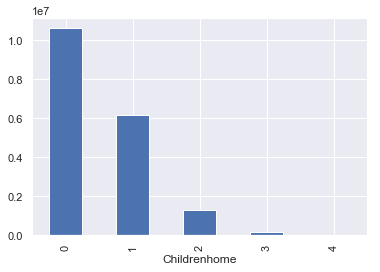

In [141]:
value = df.loc[:,['Childrenhome','MntTotal']]
value.index = value['Childrenhome']
value['MntTotal'].groupby(by=value.index).sum().plot(kind='bar',color='b')
plt.show()

In [142]:
v_child = Counter(value.Childrenhome)
v_child

Counter({0: 757, 1: 1223, 2: 459, 3: 60, 4: 1})

In [143]:
children = value['MntTotal'].groupby(by=value.index).sum()
children

Childrenhome
0    10635505
1     6186359
2     1275303
3      155979
4        1810
Name: MntTotal, dtype: int64

There are very few families with more than 2 children in the dataset

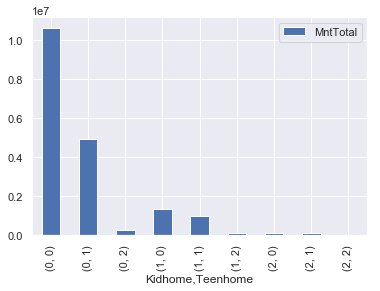

In [144]:
value = df.loc[:,['Kidhome','Teenhome','MntTotal']]
value.groupby(['Kidhome','Teenhome']).sum().plot(kind='bar',color='b')
plt.show()

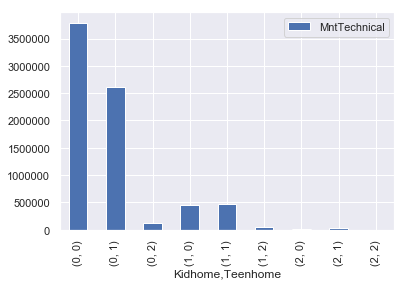

In [145]:
value = df.loc[:,['Kidhome','Teenhome','MntTechnical']]
value.groupby(['Kidhome','Teenhome']).sum().plot(kind='bar',color='b')
plt.show()

As expected in terms of total sales the portion of the population has less when comparing the total purchases of the group

In [146]:
agg_child = {k: children[k]/v_child[k] for k, n_child in v_child.items()}

In [147]:
agg_child

{0: 14049.544253632761,
 1: 5058.347506132462,
 2: 2778.4379084967322,
 3: 2599.65,
 4: 1810.0}

In [148]:
value_T = df['MntTotal']

In [149]:
Mnt_C = [c for c in df.columns if "Mnt" in c]
#Mnt_C.append('Childrenhome')
Mnt_C.append('Kidhome')
Mnt_C.append('Teenhome')
Mnt_C
value = df[Mnt_C]

Aggre_Mnt_Child = value.groupby(['Kidhome','Teenhome']).sum()/value.groupby(['Kidhome','Teenhome']).count()
Aggre_Mnt_Child

MntTechnical   MntRomance  MntAdventure  MntTravelling  \
Kidhome Teenhome                                                           
0       0          5009.167768  1090.528402   5685.346103    1087.009247   
        1          3893.733931   449.946188   1956.741405     459.294469   
        2          3969.393939   531.272727   2018.181818     470.303030   
1       0           823.027076   226.963899    738.720217     224.880866   
        1          1204.098985   163.137056    699.467005     152.274112   
        2          1409.655172   294.482759    946.551724     240.000000   
2       0           337.156250   333.250000    530.687500     222.125000   
        1          1102.258065   120.645161    569.032258      78.064516   
        2           920.000000     0.000000    840.000000      20.000000   

                   MntHistory  MntHardcover      MntTotal  
Kidhome Teenhome                                           
0       0         1111.450462     66.042272  14049.544254  
        1          497.007474     52.396114   7309.119581  
        2          677.696970     61.727273   7728.575758  
1       0          297.671480     29.093863   2340.357401  
        1          184.878173     24.195431   2428.050761  
        2          304.827586     27.137931   3222.655172  
2       0          519.125000     45.406250   1987.750000  
        1          125.806452     21.032258   2016.838710  
        2           20.000000     10.000000   1810.000000

It seems like the per capita analysis indicates that people without children seem to buy more books in any of the categories.

In [150]:
Mnt_C = ['DepVar']
Mnt_C.append('Kidhome')
Mnt_C.append('Teenhome')
value = df[Mnt_C]

Aggre_Mnt_Child = value.groupby(['Kidhome','Teenhome']).sum()/value.groupby(['Kidhome','Teenhome']).count()
Aggre_Mnt_Child

DepVar
Kidhome Teenhome          
0       0         0.194188
        1         0.080717
        2         0.121212
1       0         0.129964
        1         0.078680
        2         0.034483
2       0         0.125000
        1         0.064516
        2         0.000000

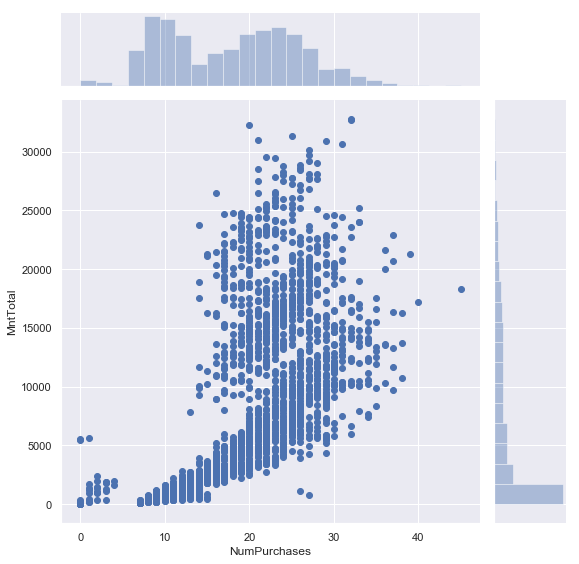

In [151]:
sns.jointplot(x='NumPurchases',y='MntTotal',data=df, height = 8)
plt.show()

By observing the graph we can see some odd values for purchases lower than 7, we can even see Money spent on items with 0 purchases

In [152]:
len(df[(df['NumPurchases']<7)])

40

There are 40 items in this category, therefore we will analyse what their relation is with the dependent variable

In [153]:
len(df[(df['NumPurchases']<7) & (df['DepVar'] == 1)])

0

None of these observations accepted the campaing, as such we will drop them from our analysis and seeing as the dataset is unbalanced we have enough cases to translate clients that don't adhere to the campaign.

In [154]:
df = df[df['NumPurchases'] >= 7]

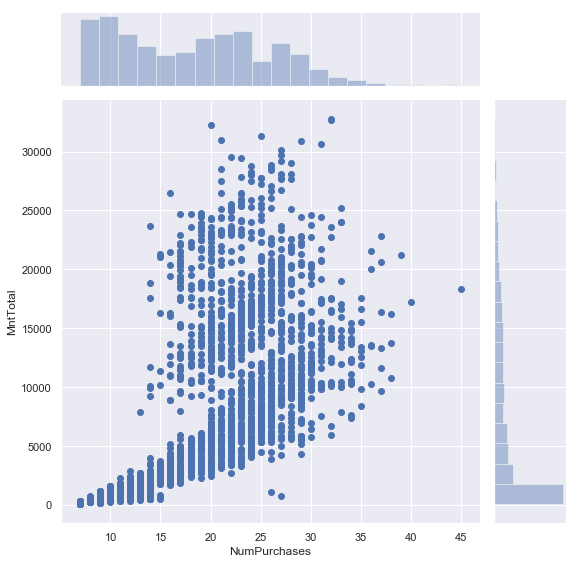

In [155]:
sns.jointplot(x='NumPurchases',y='MntTotal',data=df, height = 8)
plt.show()

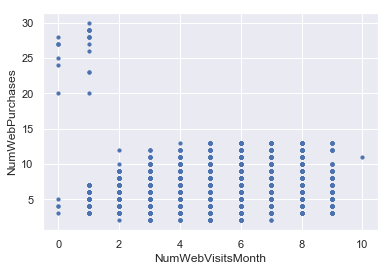

In [156]:
plt.scatter(df.NumWebVisitsMonth, df.NumWebPurchases, s=10)
plt.ylabel('NumWebPurchases')
plt.xlabel('NumWebVisitsMonth')
plt.show()

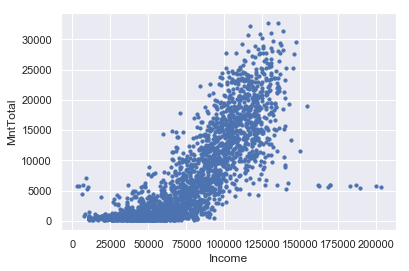

In [157]:
plt.scatter(df.Income, df.MntTotal, s=10)
plt.ylabel('MntTotal')
plt.xlabel('Income')
plt.show()

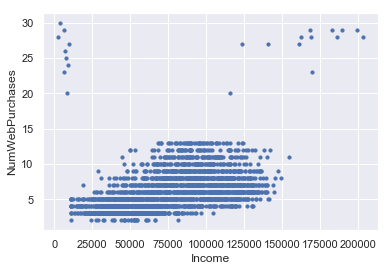

In [158]:
plt.scatter(df.Income, df.NumWebPurchases, s=10)
plt.ylabel('NumWebPurchases')
plt.xlabel('Income')
plt.show()

In [159]:
len(df[(df['NumWebPurchases']>15)])

22

In [160]:
len(df[(df['NumWebPurchases']>15) & (df['DepVar'] == 1)])

0

In [161]:
df = df[(df['NumWebPurchases']<15)]

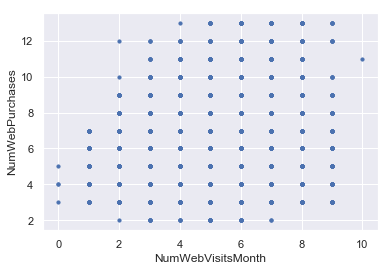

In [162]:
plt.scatter(df.NumWebVisitsMonth, df.NumWebPurchases, s=10)
plt.ylabel('NumWebPurchases')
plt.xlabel('NumWebVisitsMonth')
plt.show()

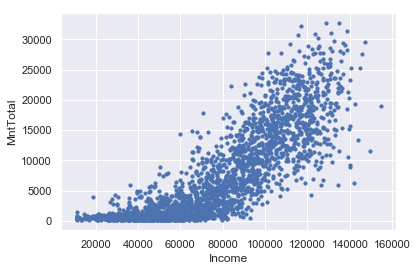

In [163]:
plt.scatter(df.Income, df.MntTotal, s=10)
plt.ylabel('MntTotal')
plt.xlabel('Income')
plt.show()

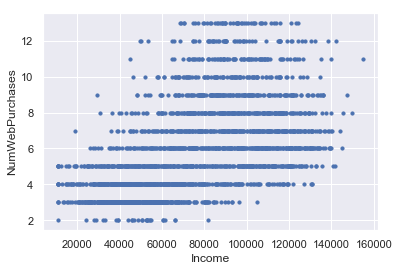

In [164]:
plt.scatter(df.Income, df.NumWebPurchases, s=10)
plt.ylabel('NumWebPurchases')
plt.xlabel('Income')
plt.show()

These cases were dropped for being anomalous and follow the trend that this is a unbalanced dataset and we want to keep cases that more accuratly transalate what we are looking for.
By doing this we have a cleaner dataset.

In [165]:
print('After the transformation there are',df.shape[0],'rows and',df.shape[1],'columns')

After the transformation there are 2438 rows and 43 columns


### Variable CorrelationCenter
This section we study using seaborn heatmaps the correlation between the variables of our transformed dataset.

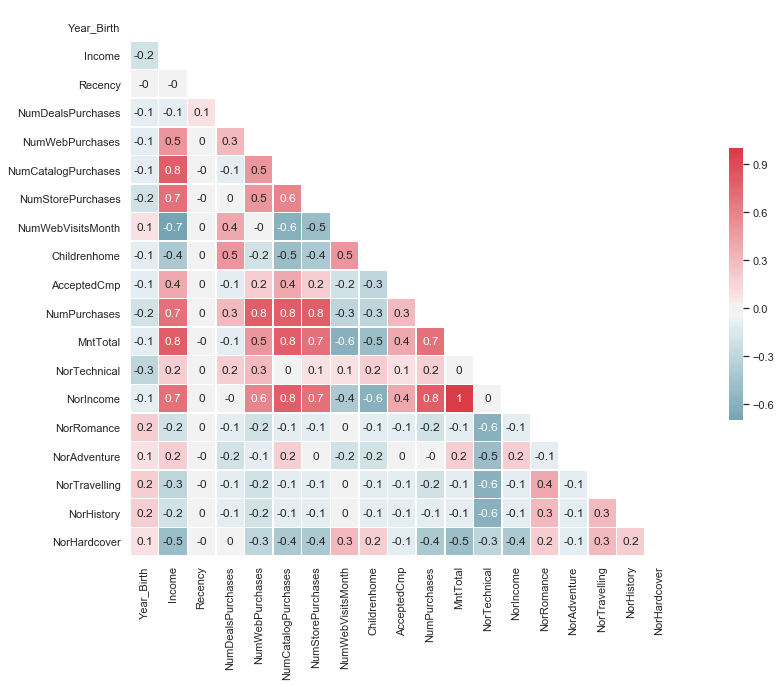

In [166]:
#from string import ascii_letters
sns.set(style="white")

# Compute the correlation matrix

Edu = [c for c in df.columns if "Edu" in c]
Marital = [c for c in df.columns if "Marital" in c]
drop = ['Dt_Customer','Custid','Teenhome','Kidhome','Complain','DepVar']
df_corr = df
df_corr = df_corr.drop(Edu,axis=1)
df_corr = df_corr.drop(Marital,axis=1)
df_corr = df_corr.drop(AcceptedCmp,axis=1)
df_corr = df_corr.drop(drop,axis=1)
#df_corr = df_corr.drop('MntTotal',axis=1)
df_corr = df_corr.drop(MntTotal,axis=1)

corr = round(df_corr.corr(),1)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

The Recency doesn't have a strong correlation with any of the given variables.
We cannot do this analysis for binary variables

In [167]:
drop = ['Dt_Customer','Custid','Complain','Teenhome','Kidhome','Recency','NorIncome']

df = df.drop(drop,axis=1)
df = df.drop(MntTotal,axis=1)
df = df.drop('MntTotal',axis=1)
df = df.drop(AcceptedCmp,axis=1)
df = df.drop('NumPurchases',axis=1)

print("Column headings:\n",df.columns)

labels = df['DepVar']
features = df.drop('DepVar',axis=1)
feature_list = list(features.columns)

Column headings:
 Index(['Year_Birth', 'Income', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'DepVar', 'Education_Basic Education', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together', 'Childrenhome',
       'AcceptedCmp', 'NorTechnical', 'NorRomance', 'NorAdventure',
       'NorTravelling', 'NorHistory', 'NorHardcover'],
      dtype='object')


# PredictCenter
### Which classifier is best suited for our data set

In [168]:
def shape(train_features, test_features, train_labels, test_labels):
    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    print('Testing Features Shape:', test_features.shape)
    print('Testing Labels Shape:', test_labels.shape)

In [169]:
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(
                                                                             features, labels, test_size = 0.15
                                                                            ,random_state = 15
                                                                            ,stratify=labels
                                                                            )

shape(train_features, test_features, train_labels, test_labels)

Training Features Shape: (2072, 22)
Training Labels Shape: (2072,)
Testing Features Shape: (366, 22)
Testing Labels Shape: (366,)


In [170]:
def batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 5, verbose = True):
    """
    This method, takes as input the X, Y matrices of the Train and Test set.
    And fits them on all of the Classifiers specified in the dict_classifier.
    The trained models, and accuracies are saved in a dictionary. The reason to use a dictionary
    is because it is very easy to save the whole dictionary with the pickle module.
    
    Usually, the SVM, Random Forest and Gradient Boosting Classifier take quiet some time to train. 
    So it is best to train them on a smaller dataset first and 
    decide whether you want to comment them out or not based on the test accuracy score.
    """
    
    dict_models = {}
    for classifier_name, classifier in list(dict_classifiers.items())[:no_classifiers]:
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)
        dict_models[classifier_name] = {'model': classifier, 'train_score': train_score, 'test_score': test_score, 'train_time': t_diff}
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=classifier_name, f=t_diff))
    return dict_models



def display_dict_models(dict_models, sort_by='test_score'):
    cls = [key for key in dict_models.keys()]
    test_s = [dict_models[key]['test_score'] for key in cls]
    training_s = [dict_models[key]['train_score'] for key in cls]
    training_t = [dict_models[key]['train_time'] for key in cls]
    
    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls),4)), columns = ['classifier', 'train_score', 'test_score', 'train_time'])
    for ii in range(0,len(cls)):
        df_.loc[ii, 'classifier'] = cls[ii]
        df_.loc[ii, 'train_score'] = training_s[ii]
        df_.loc[ii, 'test_score'] = test_s[ii]
        df_.loc[ii, 'train_time'] = training_t[ii]
    
    display(df_.sort_values(by=sort_by, ascending=False))

In [171]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=50),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=50),
    "Neural Net": MLPClassifier(alpha = 1),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Gaussian Process": GaussianProcessClassifier()
}

dict_models = batch_classify(train_features, train_labels, test_features, test_labels, no_classifiers = 11)
display_dict_models(dict_models)

C:\Users\e345984\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\e345984\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


trained Logistic Regression in 0.01 s
trained Nearest Neighbors in 0.01 s
trained Linear SVM in 0.54 s
trained Gradient Boosting Classifier in 0.19 s
trained Decision Tree in 0.03 s
trained Random Forest in 0.27 s
trained Neural Net in 0.14 s
trained Naive Bayes in 0.00 s
trained AdaBoost in 0.24 s
trained QDA in 0.00 s


C:\Users\e345984\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\e345984\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


trained Gaussian Process in 3.73 s


,classifier,train_score,test_score,train_time
3,Gradient Boosting Classifier,0.928089,0.912568,0.187972
8,AdaBoost,0.915541,0.907104,0.236579
5,Random Forest,1.000000,0.896175,0.267286
7,Naive Bayes,0.875483,0.890710,0.003060
0,Logistic Regression,0.870656,0.871585,0.009399
2,Linear SVM,0.999517,0.871585,0.540032
6,Neural Net,0.870656,0.871585,0.136255
1,Nearest Neighbors,0.876931,0.866120,0.005639
4,Decision Tree,1.000000,0.857923,0.031608
9,QDA,0.847490,0.838798,0.004145


From this analysis it is possible to see that the Gradient Boosting Classifier is having the best performance, therefore we will test a few configurations of hyperparameters for this model.  
Also, the QDA model seems to bee issuing a warning for colinear variables, we will test the hypothesis of removing these variables in a new dataframe.

In [172]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

#Removing correlated variables
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

#Reference: https://stackoverflow.com/questions/29298973/removing-features-with-low-variance-using-scikit-learn

In [173]:
df_co = calculate_vif_(df)

C:\Users\e345984\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'Education_Basic Education' at index: 8
dropping 'Marital_Status_Married' at index: 11
dropping 'NorTechnical' at index: 15
dropping 'Year_Birth' at index: 0
dropping 'Income' at index: 0
dropping 'NumWebPurchases' at index: 1
dropping 'NumWebVisitsMonth' at index: 3
dropping 'NumStorePurchases' at index: 2
dropping 'NorAdventure' at index: 11
Remaining variables:
Index(['NumDealsPurchases', 'NumCatalogPurchases', 'DepVar',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Single', 'Marital_Status_Together', 'Childrenhome',
       'AcceptedCmp', 'NorRomance', 'NorTravelling', 'NorHistory',
       'NorHardcover'],
      dtype='object')


We shouldn't drop variables of the same class therefore we will drop only drop the Education variable and keep all other.

In [174]:
Edu = [c for c in df.columns if "Education" in c]
df_co = df.drop(Edu,axis=1)
drop = ['Year_Birth']
df_co = df_co.drop(drop,axis=1)

In [175]:
def model_results(predict,labels):
    '''This function serves to calculate the precision, recall, f1-score, auc and give a possible result 
    for a campaign of 2500 contacts given a model input and features'''
    #True positive and negative rates
    tn, fp, fn, tp = confusion_matrix(predict, labels).ravel()
    precision = tp/(tp+fp)
    print('precision:',round(precision,2))
    recall = tp/(tp+fn)
    print('recall:',round(recall,2))
    f1 = 2*(precision*recall)/(precision+recall)
    print('F1 Score:',round((f1),2))
    auc = roc_auc_score(labels, predict)
    print('AUC:',round(auc,2))
    max_profit = 100000*0.125*(Revenue - CostContact)
    campaign_results = 2500*precision*Revenue - (2500)*CostContact
    print('For a campaign with 2500 clients the Model expected Profit is',round(campaign_results,2),'€')
    print('For the population of 100k and if we assume that 12,5% would adhere to the campaing the possible max profit would be',max_profit)

### Gradient Boosting Classifier

In [176]:
gb_default = GradientBoostingClassifier(n_estimators=50)
gb_default.fit(train_features, train_labels)
predict_gb_default = gb_default.predict(test_features)
model_results(predict_gb_default, test_labels)

precision: 0.36
recall: 0.89
F1 Score: 0.52
AUC: 0.68
For a campaign with 2500 clients the Model expected Profit is 6968.09 €
For the population of 100k and if we assume that 12,5% would adhere to the campaing the possible max profit would be 162500.0


In [177]:
labels_co = df_co['DepVar']
features_co = df_co.drop('DepVar',axis=1)
train_features_co, test_features_co, train_labels_co, test_labels_co = train_test_split(
                                                                             features_co, labels_co, test_size = 0.15
                                                                            ,random_state = 15
                                                                            ,stratify=labels
                                                                            )
shape(train_features_co, test_features_co, train_labels_co, test_labels_co)
gb_default_co = GradientBoostingClassifier(n_estimators=50)
gb_default_co.fit(train_features_co, train_labels_co)
predict_gb_default_co = gb_default_co.predict(test_features_co)
model_results(predict_gb_default_co, test_labels_co)

Training Features Shape: (2072, 17)
Training Labels Shape: (2072,)
Testing Features Shape: (366, 17)
Testing Labels Shape: (366,)
precision: 0.23
recall: 0.79
F1 Score: 0.36
AUC: 0.61
For a campaign with 2500 clients the Model expected Profit is 1861.7 €
For the population of 100k and if we assume that 12,5% would adhere to the campaing the possible max profit would be 162500.0


Removing the correlated variables seems to worsen the results of our model with basic hyperparemeters. Therefore we will disconsider the df_co dataframe in the analysis to follow.

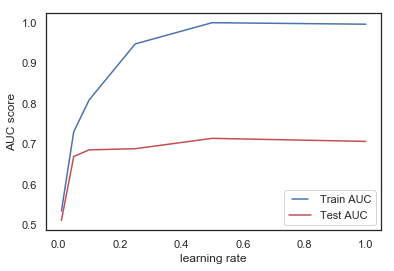

In [178]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingClassifier(learning_rate=eta)
    model.fit(train_features, train_labels)
    train_pred = model.predict(train_features)
    roc_auc = roc_auc_score(train_labels, train_pred)
    train_results.append(roc_auc)
    y_pred = model.predict(test_features)
    roc_auc = roc_auc_score(test_labels, y_pred)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

From this plot we can evaluate from which LR the model starts to become overfitted to the train data withouth capturing much value for the test data.

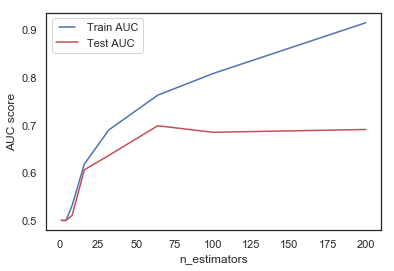

In [179]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator)
    model.fit(train_features, train_labels)
    train_pred = model.predict(train_features)
    roc_auc = roc_auc_score(train_labels, train_pred)
    train_results.append(roc_auc)
    y_pred = model.predict(test_features)
    roc_auc = roc_auc_score(test_labels, y_pred)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

It seems that after 75 to 100 estimatores the model starts to become overfitted to the train data and starts to have a negative effect on the test data.

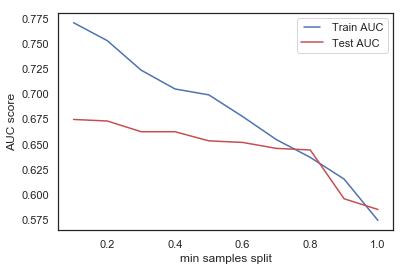

In [180]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    model = GradientBoostingClassifier(min_samples_split=min_samples_split)
    model.fit(train_features, train_labels)
    train_pred = model.predict(train_features)
    roc_auc = roc_auc_score(train_labels, train_pred)
    train_results.append(roc_auc)
    y_pred = model.predict(test_features)
    roc_auc = roc_auc_score(test_labels, y_pred)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

The higher the sample for the splits the higher the underfiting of the model

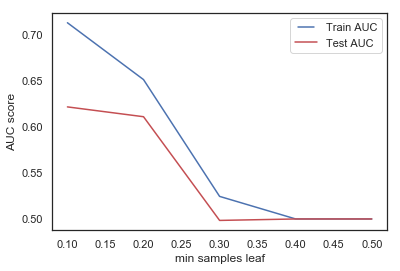

In [181]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    model = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
    model.fit(train_features, train_labels)
    train_pred = model.predict(train_features)
    roc_auc = roc_auc_score(train_labels, train_pred)
    train_results.append(roc_auc)
    y_pred = model.predict(test_features)
    roc_auc = roc_auc_score(test_labels, y_pred)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

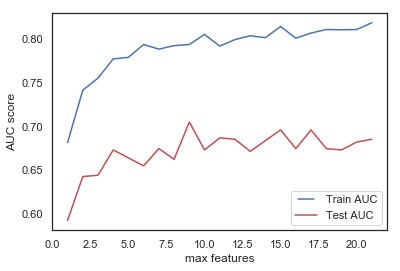

In [182]:
max_features = list(range(1,train_features.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    model = GradientBoostingClassifier(max_features=max_feature)
    model.fit(train_features, train_labels)
    train_pred = model.predict(train_features)
    roc_auc = roc_auc_score(train_labels, train_pred)
    train_results.append(roc_auc)
    y_pred = model.predict(test_features)
    roc_auc = roc_auc_score(test_labels, y_pred)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

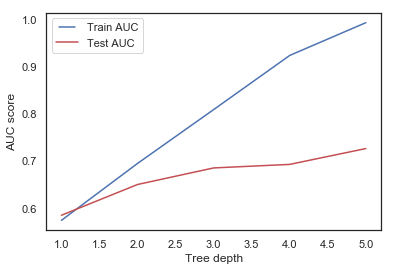

In [183]:
max_depths = np.linspace(1, 5, 5, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    model = GradientBoostingClassifier(max_depth=max_depth)
    model.fit(train_features, train_labels)
    train_pred = model.predict(train_features)
    roc_auc = roc_auc_score(train_labels, train_pred)
    train_results.append(roc_auc)
    y_pred = model.predict(test_features)
    roc_auc = roc_auc_score(test_labels, y_pred)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [184]:
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.8, max_depth = 2)
gb.fit(train_features,train_labels)
predict_gb = gb.predict(test_features)
model_results(predict_gb, test_labels)

precision: 0.6
recall: 0.72
F1 Score: 0.65
AUC: 0.78
For a campaign with 2500 clients the Model expected Profit is 16329.79 €
For the population of 100k and if we assume that 12,5% would adhere to the campaing the possible max profit would be 162500.0


From the plots we made and with a bit of custom tweaking these were the values of the hyperparameters that seemed to best fit our dataset.

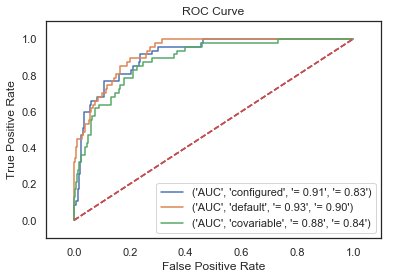

In [185]:
def plot_roc(model,test_features,test_labels,model_type):
    y_preds = model.predict_proba(test_features)
    y = model.predict(test_features)
    # take the second column because the classifier outputs scores for
    # the 0 class as well
    preds = y_preds[:,1]

    # fpr means false-positive-rate
    # tpr means true-positive-rate
    fpr, tpr, _ = roc_curve(test_labels, preds)

    auc_score = auc(fpr, tpr)
    b_auc_score = balanced_accuracy_score(y, test_labels)
    # clear current figure
    #plt.clf()

    plt.title('ROC Curve')
    plt.plot(fpr, tpr, label=('AUC',model_type,'= {:.2f}'.format(auc_score),'= {:.2f}'.format(b_auc_score)))

    # it's helpful to add a diagonal to indicate where chance 
    # scores lie (i.e. just flipping a coin)
    plt.plot([0,1],[0,1],'r--')

    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    plt.legend(loc='lower right')
   #plt.show()


plot_roc(gb,test_features,test_labels,'configured')
plot_roc(gb_default,test_features,test_labels,'default')
plot_roc(gb_default_co,test_features_co,test_labels_co,'covariable')

The resulted plots for the ROC curve are interesting, it is important to note that our dataset is unbalanced and so the number of target variables is underrepresented, meaning that the accuracy of the model also reflects its capacity to classify non-adhering clients to the campaign as well.  
From the analysis done in this section of the project the winning model is the Gradient Boosting Classifier with 100 estimators, 0.8 learning rate and 2 max depth.

### Gaussian Process Classifier

In [186]:
parameter_space = {
    'kernel': [1.0 * RBF(1.0), 1.0 * RBF(1.5), 2.0 * RBF(1.5)],
    'optimizer': ['fmin_l_bfgs_b'],
    'n_restarts_optimizer': [0,1],
    'max_iter_predict': [25,50,100],
    'n_jobs': [-1],
}

In [187]:
gpc_default = GaussianProcessClassifier()

In [188]:
gpc = GridSearchCV(gpc_default, parameter_space)

In [189]:
gpc.fit(train_features, train_labels)
gpc_default.fit(train_features, train_labels)

C:\Users\e345984\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GaussianProcessClassifier(copy_X_train=True, kernel=None,
             max_iter_predict=100, multi_class='one_vs_rest', n_jobs=None,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=False)

In [190]:
predict_gpc_default = gpc_default.predict(test_features)
predict_gpc = gpc.predict(test_features)

In [191]:
model_results(predict_gpc_default, test_labels)

precision: 0.04
recall: 0.11
F1 Score: 0.06
AUC: 0.49
For a campaign with 2500 clients the Model expected Profit is -5797.87 €
For the population of 100k and if we assume that 12,5% would adhere to the campaing the possible max profit would be 162500.0


In [192]:
model_results(predict_gpc, test_labels)

precision: 0.09
recall: 0.15
F1 Score: 0.11
AUC: 0.51
For a campaign with 2500 clients the Model expected Profit is -4095.74 €
For the population of 100k and if we assume that 12,5% would adhere to the campaing the possible max profit would be 162500.0


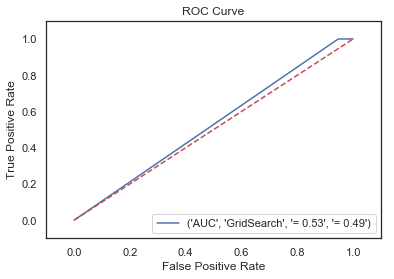

In [193]:
plot_roc(gpc_default,test_features,test_labels,'GridSearch')
#plot_roc(gpc,test_features,test_labels,'GridSearch')

The results of our first attemp at using grid search with the GaussianProcessClassifier didn't yield the good results.

# Random Forest

In [194]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 13, 25, 37, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [195]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 50, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(train_features, train_labels);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.0min finished


In [196]:
#d_rf = rf_random.best_params_
d_rf = {'n_estimators': 388,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 11,
 'bootstrap': False}
rf = RandomForestRegressor(n_estimators = 250,
                             random_state = 42
                            )
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

Feature ranking:
1. feature 21 - NorHardcover (0.135470)
2. feature 15 - AcceptedCmp (0.114802)
3. feature 1 - Income (0.081645)
4. feature 0 - Year_Birth (0.068335)
5. feature 20 - NorHistory (0.068033)
6. feature 10 - Education_PhD (0.060797)
7. feature 3 - NumWebPurchases (0.059988)
8. feature 18 - NorAdventure (0.057268)
9. feature 6 - NumWebVisitsMonth (0.050029)
10. feature 19 - NorTravelling (0.048143)
11. feature 16 - NorTechnical (0.048011)
12. feature 17 - NorRomance (0.045551)
13. feature 12 - Marital_Status_Single (0.038198)
14. feature 5 - NumStorePurchases (0.028712)
15. feature 2 - NumDealsPurchases (0.025038)
16. feature 4 - NumCatalogPurchases (0.021467)
17. feature 14 - Childrenhome (0.012861)
18. feature 9 - Education_Master (0.011501)
19. feature 11 - Marital_Status_Married (0.007265)
20. feature 8 - Education_Graduation (0.006257)
21. feature 13 - Marital_Status_Together (0.005368)
22. feature 7 - Education_Basic Education (0.005260)


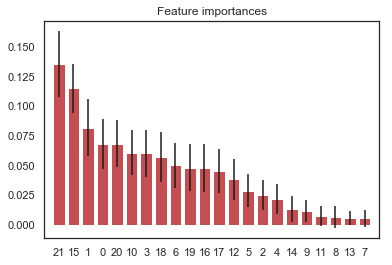

In [197]:
# Study feature importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

ind = []
for i in indices:
    ind.append(feature_list[i])
ind = np.asarray(ind)

# Print the feature ranking
print("Feature ranking:")

for f in range(train_features.shape[1]):
    print("%d. feature %d - %s (%f)" % (f+1,indices[f], ind[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_features.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_features.shape[1]), indices)
plt.xlim([-1, train_features.shape[1]])
plt.show()

In [198]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
predictions = np.rint(predictions).astype(int)

In [199]:
model_results(predictions, test_labels)

precision: 0.32
recall: 0.71
F1 Score: 0.44
AUC: 0.65
For a campaign with 2500 clients the Model expected Profit is 5265.96 €
For the population of 100k and if we assume that 12,5% would adhere to the campaing the possible max profit would be 162500.0


AUC: 0.874


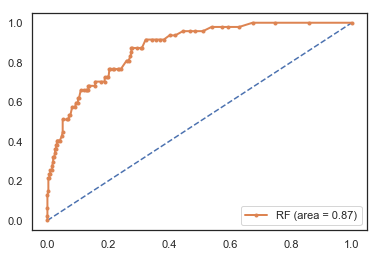

In [200]:
predict_rf = rf.predict(test_features)
# calculate AUC
auc_rf = roc_auc_score(test_labels,predict_rf)

print('AUC: %.3f' % auc_rf)

# calculate roc curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_labels, predict_rf)


# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_rf, tpr_rf, marker='.',lw=2,label='RF (area = %0.2f)' % auc_rf)

plt.legend(loc="lower right")
# show the plot
plt.show()

In [201]:
# Number of trees in random forest
n_estimators = [50,100,500,1000]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [1,10]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,4,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [50, 100, 500, 1000], 'max_features': ['auto'], 'max_depth': [1, 10, None], 'min_samples_split': [2, 4, 10], 'min_samples_leaf': [1], 'bootstrap': [True, False]}


In [202]:
rf_grid = RandomForestRegressor(random_state = 42)
clf = GridSearchCV(rf_grid, random_grid)

In [203]:
clf.fit(train_features, train_labels)

C:\Users\e345984\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 500, 1000], 'max_features': ['auto'], 'max_depth': [1, 10, None], 'min_samples_split': [2, 4, 10], 'min_samples_leaf': [1], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [204]:
d_rf = clf.best_params_
rf = RandomForestRegressor(**d_rf,
                             random_state = 42
                            )
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

Feature ranking:
1. feature 15 - AcceptedCmp (0.157131)
2. feature 21 - NorHardcover (0.146286)
3. feature 10 - Education_PhD (0.079196)
4. feature 1 - Income (0.076575)
5. feature 0 - Year_Birth (0.065387)
6. feature 3 - NumWebPurchases (0.064439)
7. feature 20 - NorHistory (0.063806)
8. feature 6 - NumWebVisitsMonth (0.050536)
9. feature 18 - NorAdventure (0.046697)
10. feature 12 - Marital_Status_Single (0.044601)
11. feature 19 - NorTravelling (0.037457)
12. feature 16 - NorTechnical (0.036933)
13. feature 17 - NorRomance (0.033920)
14. feature 2 - NumDealsPurchases (0.022022)
15. feature 5 - NumStorePurchases (0.020498)
16. feature 4 - NumCatalogPurchases (0.013299)
17. feature 14 - Childrenhome (0.011562)
18. feature 9 - Education_Master (0.011104)
19. feature 11 - Marital_Status_Married (0.006522)
20. feature 8 - Education_Graduation (0.005270)
21. feature 7 - Education_Basic Education (0.003819)
22. feature 13 - Marital_Status_Together (0.002941)


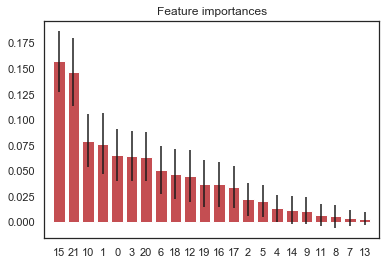

In [205]:
# Study feature importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

ind = []
for i in indices:
    ind.append(feature_list[i])
ind = np.asarray(ind)

# Print the feature ranking
print("Feature ranking:")

for f in range(train_features.shape[1]):
    print("%d. feature %d - %s (%f)" % (f+1,indices[f], ind[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_features.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_features.shape[1]), indices)
plt.xlim([-1, train_features.shape[1]])
plt.show()

In [206]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
predictions = np.rint(predictions).astype(int)

In [207]:
model_results(predictions, test_labels)

precision: 0.26
recall: 0.63
F1 Score: 0.36
AUC: 0.62
For a campaign with 2500 clients the Model expected Profit is 2712.77 €
For the population of 100k and if we assume that 12,5% would adhere to the campaing the possible max profit would be 162500.0


AUC: 0.871


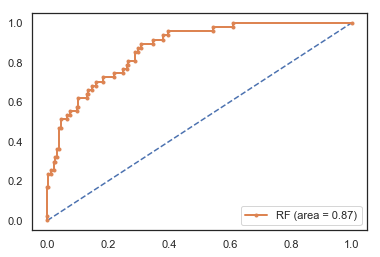

In [208]:
predict_rf = rf.predict(test_features)
# calculate AUC
auc_rf = roc_auc_score(test_labels,predict_rf)

print('AUC: %.3f' % auc_rf)

# calculate roc curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_labels, predict_rf)


# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_rf, tpr_rf, marker='.',lw=2,label='RF (area = %0.2f)' % auc_rf)

plt.legend(loc="lower right")
# show the plot
plt.show()